# Folium is a powerful data visualization library in Python that was built primarily to help people visualize geospatial data. With Folium, one can create a map of any location in the world. Folium is actually a python wrapper for leaflet.js which is a javascript library for plotting interactive maps.

In [1]:
import folium
# folium.Map() create a base map and store it in an object.
# location=[40.7128, -74.0060] sets the initial center of the map to the coordinates of New York City.
map_nyc = folium.Map(location=[40.7128, -74.0060], tiles="OpenStreetMap", zoom_start=10)   # BY DEFAULT tiles="OpenStreetMap"
# Create a marker for statue of liberty
folium.Marker(
    [40.6892, -74.0445],
    popup='Statue of Liberty',     # This is the popup text which get display on clicking
    tooltip='Click for more info'  # This will show on hover
).add_to(map_nyc)                  # adds the marker to the map_nyc map.
map_nyc
map_nyc.save('NYC_Map.html')       # This saves the current state of the map_nyc map to an HTML file named NYC_Map.html.
# Use list of locations, if we want to create markers for various locations
locations = [
    (40.6892, -74.0445, 'Statue of Liberty'),
    (40.748817, -73.985428, 'Empire State Building')
]
for lat, lon, name in locations:
    folium.Marker(
        [lat, lon],
        popup=name,
        tooltip='Click for more info',
        icon=folium.Icon(icon="flag")    # icon="flag","star","cloud","camera","book","home","info_sign"
).add_to(map_nyc)
folium.Marker(
    [40.730610, -73.935242],
    popup='Another Marker',
    icon=folium.Icon(icon="cloud",color="green")
).add_to(map_nyc)


In [2]:
# IPython.display modules are used for rendering the HTML representation of the map directly in the Jupyter Notebook.
from IPython.display import display,HTML

# Display the map in Jupyter Notebook
display(HTML(map_nyc._repr_html_()))

# Choropleth Map
Choropleth maps represent divided areas in various colors based on the statistical variable presented to them.

In [17]:
import pandas as pd
map_nyc = folium.Map(location=[40.7128, -74.0060], tiles="OpenStreetMap", zoom_start=10) 
map_nyc.save('my_map.html')
# getting the data
url = (
	"https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

folium.Choropleth(

	# geographical locations
	geo_data = state_geo,					 
	name = "choropleth",

	# the data set we are using
	data = state_data,					 
	columns = ["State", "Unemployment"],	 

	# YlGn refers to yellow and green
	fill_color = "YlGn",					 
	fill_opacity = 0.7,
	line_opacity = .1,
    # ‘key on’ parameter refers to the label in the JSON object (state_geo)  which has the state detail as the feature ID attached to each country’s border information. 
	key_on = "feature.id",
	legend_name = "Unemployment Rate (%)",
).add_to(map_nyc)								 

map_nyc.save('final_map.html')


In [15]:
from IPython.display import display,HTML

# Display the map in Jupyter Notebook
display(HTML(map_nyc._repr_html_()))

In [25]:
import datetime
today=datetime.datetime.now()
print(str(today))
print(repr(today))


2024-06-01 11:53:19.609715
datetime.datetime(2024, 6, 1, 11, 53, 19, 609715)


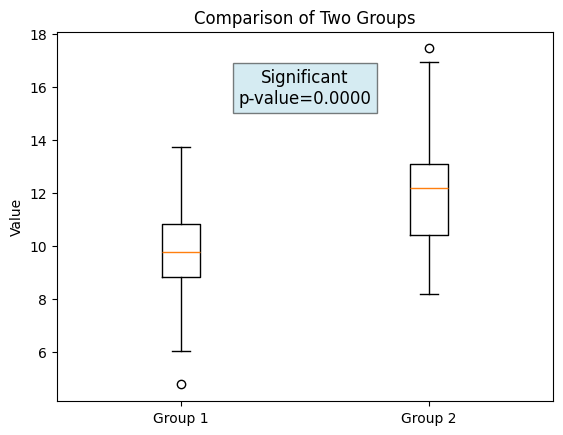

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate data
np.random.seed(42)
# Generates 100 random numbers from a normal distribution with a mean (loc) of 10 and a standard deviation (scale) of 2. This data is stored in data1.
data1 = np.random.normal(loc=10, scale=2, size=100)
data2 = np.random.normal(loc=12, scale=2, size=100)

# Perform t-test
# stats.ttest_ind(data1, data2): Performs an independent t-test on data1 and data2. The t-test compares
# the means of the two datasets to see if they are significantly different from each other.
# t_stat: The t-statistic value from the t-test.
# p_value: The p-value from the t-test, which indicates the probability that the observed differences between the datasets occurred by chance.
t_stat, p_value = stats.ttest_ind(data1, data2)

# Box plot
plt.boxplot([data1, data2], labels=['Group 1', 'Group 2'])
plt.ylabel('Value')

# Add significance level
if p_value < 0.05:
    plt.text(1.5, np.max([data1, data2]) - 0.5,
             'Significant\np-value={:.4f}'.format(p_value), ha='center', 
             va='center', fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))
    
# 1.5: The x-coordinate of the text (positioned between the two box plots).
# np.max([data1, data2]) - 0.5: The y-coordinate of the text (just below the maximum value of the data).
# bbox=dict(facecolor='lightblue', alpha=0.5): Creates a box around the text with a light blue background and 50% transparency

else:
    plt.text(1.5, np.max([data1, data2]) - 0.5,
             'Not Significant\np-value={:.4f}'.format(p_value), ha='center', 
             va='center', fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))

# Title and show plot
plt.title('Comparison of Two Groups')
plt.show()

# If the p-value is less than 0.05, we annotate the plot with "Significant" and the p-value in light blue.
# If the p-value is greater than or equal to 0.05, we annotate the plot with "Not Significant" and the p-value in light gray.


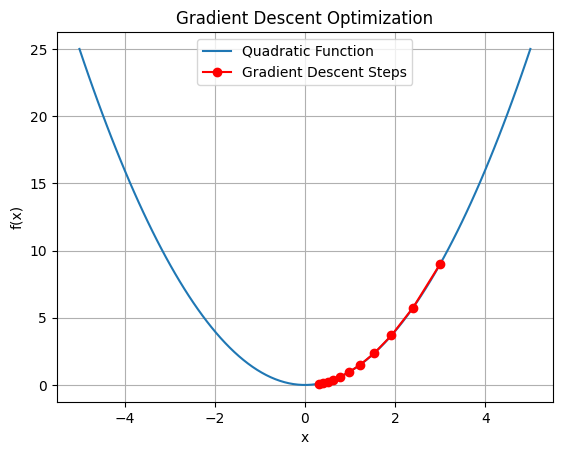

In [29]:
def quadratic_function(x):
    return x ** 2

def gradient(x):
# This function computes the gradient (or derivative) of the quadratic function 𝑓(𝑥)=𝑥**2, which is 𝑓′(𝑥)=2𝑥.
    return 2 * x
def gradient_descent(gradient, initial_x, learning_rate, iterations):
    x = initial_x
    x_history = [x]
    for i in range(iterations):
        gradient_value = gradient(x)
        x = x - learning_rate * gradient_value
        x_history.append(x)
    return x_history
# initial_x: Starting point for x.
# learning_rate: Step size for each iteration.
# iterations: Number of iterations to perform.
# x = initial_x: Set the starting value of x.
# x_history = [x]: Initialize a list to store the history of x values.

initial_x = 3
learning_rate = 0.1
iterations = 10

x_history = gradient_descent(gradient, initial_x, learning_rate, iterations)

# Plot function and gradient descent steps
x_values = np.linspace(-5, 5, 100)
plt.plot(x_values, quadratic_function(x_values), label='Quadratic Function')
plt.plot(x_history, quadratic_function(np.array(x_history)), 'ro-',label='Gradient Descent Steps')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Optimization')
plt.legend()
plt.grid(True)
plt.show()

# EXPLANATION:
# We define a simple quadratic function f(x)=x^2 and its gradient function.

# The gradient_descent function takes the gradient function, initial point,
# Learning rate, and number of iterations as input, and performs gradient descent.

# We run gradient descent on the quadratic function starting from an initial
# point and visualize the optimization process by plotting the function and
# the steps taken by gradient descent.

# Interpretation:
# Gradient descent starts from the initial point and iteratively updates the
# value of x to minimize the quadratic function f(x)=x^2.

# The red dots indicate the steps taken by gradient descent towards the minimum
# of the function.

# As the number of iterations increases, the value of x approaches the minimum
# of the quadratic function.